# HW04 - Linear Classifiers & Decision Trees

The goal of this assignment is to familiarize yourself with the SVM and Decision Tree classifiers available in scikit-learn and practice applying them to data.

This assignment does _not_ require you to implement your own classifier from scratch, but you may need to look at the SciKit-Learn documentation (https://scikit-learn.org/stable/supervised_learning.html) to figure out how to call the library methods.  Note that SVMs are in chapter 1.4, and Decision Trees are in chapter 1.10 of the linked manual.

In [1]:
# import the things we'll need
import numpy as np
from sklearn import datasets # import toy datasets (including iris)
from sklearn import neighbors # import nearest neighbor classifiers
from sklearn import svm # import SVM classifiers
from sklearn import tree # import decision tree classifiers
from sklearn.model_selection import train_test_split # import holdout validation split method
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

## Load some data
Let's go ahead and use the iris dataset again.  Load it the same way we did in Assignment 1b, and split it into 60% train and 40% test just like we did there.

**Be sure to use the argument `random_state=0` just like we did in the previous assignment.**  This is a "seed" for the random number generator; any particular seed value should always result in the same set of "random" numbers.  We'll use fixed seed values here because it will allow everyone to get the same results.

In [2]:
from sklearn.datasets import load_iris
# load the iris dataset and split it

iris_data = load_iris()

iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_df["Iris Type"] = iris_data.target_names[iris_data.target]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris Type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
x_train, x_test, y_train, y_test = train_test_split(iris_df.iloc[:, 0:4], iris_df["Iris Type"],test_size = 0.4, random_state = 0)

## Create a Nearest Neighbor classifier
Create a nearest neighbor classifier just like we did in Assignment 1b; here, we will use it as a baseline for comparing our new classifiers.  Be sure to train it and then evaluate its performance on the testing data (again, you should be able to use code from the previous assignment with little or no modification to do this).  Use an n_neighbors value of 1.  This should give you the same accuracy as you got in the previous assignment.

Once you've got it working, try changing the `random_state` value in the train_test_split function to 1 and re-running your nearest-neighbor classifier.  Try it again with a value of 2.  Write down each of the accuracies below; the first one has been done for you.

In [4]:
# create, train, and test a nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

for i in range(0,3):
    x_train, x_test, y_train, y_test = train_test_split(iris_df.iloc[:, 0:4], iris_df["Iris Type"],test_size = 0.4, random_state = i)
    knn = KNeighborsClassifier(n_neighbors=1, 
                               p=2, 
                               metric='minkowski')
    knn.fit(x_train, y_train)
    print("seed = ", i , "accuracy = ", knn.score(x_test, y_test))

seed =  0 accuracy =  0.9166666666666666
seed =  1 accuracy =  0.9666666666666667
seed =  2 accuracy =  0.9666666666666667


**Question 1: accuracy of nearest neighbor for different random seed values**

seed=0, accuracy = 0.9166666666666666

seed=1, accuracy =

seed=2, accuracy = 

## Create a linear SVM
Code to create a linear SVM is given; however, it is left to you to add lines to train the SVM on the training data and then evaluate its accuracy on the testing data.  This should work just like the training/testing process did using the nearestNeighbor class.

Test your classifier on different train/test splits using the same three random-seed values as previously, and report the accuracies you get.

In [5]:
linearSvm = svm.SVC(kernel='linear')
# train and test
train_test_splits = [0.2, 0.3, 0.4]
seeds = [0, 1, 2]
for split,seed in zip(train_test_splits, seeds):
    x_train, x_test, y_train, y_test = train_test_split(iris_df.iloc[:, 0:4], iris_df["Iris Type"],test_size = split, random_state = seed)
    linearSvm.fit(x_train, y_train)    
    print("seed = ", seed, "accuracy = ", linearSvm.score(x_test, y_test))

seed =  0 accuracy =  1.0
seed =  1 accuracy =  1.0
seed =  2 accuracy =  0.9666666666666667


**Question 2: accuracy of linear SVM for different random seed values**

seed=0, accuracy =

seed=1, accuracy =

seed=2, accuracy = 

## Create a polynomial-kernel SVM
Create another SVM, only this time use the argument `kernel='poly'` to make an SVM using a polynomial kernel.  Train and test it with different seed values as before.

In [6]:
# create, train, and test
linearSvm = svm.SVC(kernel='poly')
# train and test
train_test_splits = [0.2, 0.3, 0.4]
seeds = [0, 1, 2]
for split,seed in zip(train_test_splits, seeds):
    x_train, x_test, y_train, y_test = train_test_split(iris_df.iloc[:, 0:4], iris_df["Iris Type"],test_size = split, random_state = seed)
    linearSvm.fit(x_train, y_train)    
    print("seed = ", seed, "accuracy = ", linearSvm.score(x_test, y_test))


seed =  0 accuracy =  1.0
seed =  1 accuracy =  0.9777777777777777
seed =  2 accuracy =  0.9666666666666667


**Question 3: accuracy of polynomial SVM for different random seed values**

seed=0, accuracy =

seed=1, accuracy =

seed=2, accuracy = 

## Create a rbf-kernel SVM

Create another svm, this time using `'rbf'` for the kernel type.  Train and test as before.

In [7]:
# create, train, and test
linearSvm = svm.SVC(kernel='rbf')
# train and test
train_test_splits = [0.2, 0.3, 0.4]
seeds = [0, 1, 2]
for split,seed in zip(train_test_splits, seeds):
    x_train, x_test, y_train, y_test = train_test_split(iris_df.iloc[:, 0:4], iris_df["Iris Type"],test_size = split, random_state = seed)
    linearSvm.fit(x_train, y_train)    
    print("seed = ", seed, "accuracy = ", linearSvm.score(x_test, y_test))

seed =  0 accuracy =  1.0
seed =  1 accuracy =  0.9777777777777777
seed =  2 accuracy =  0.9333333333333333


**Question 4: accuracy of rbf SVM for different random seed values**

seed=0, accuracy =

seed=1, accuracy =

seed=2, accuracy = 

## Create a Decision Tree

Create a decision tree, using `tree.DecisionTreeClassifier()` as your classifier.  Train and test as before.

In [8]:
# create, train, and test
decision_tree = tree.DecisionTreeClassifier()

train_test_splits = [0.2, 0.3, 0.4]
seeds = [0, 1, 2]
for split,seed in zip(train_test_splits, seeds):
    x_train, x_test, y_train, y_test = train_test_split(iris_df.iloc[:, 0:4], iris_df["Iris Type"],test_size = split, random_state = seed)
    decision_tree.fit(x_train, y_train)    
    print("seed = ", seed, "accuracy = ", linearSvm.score(x_test, y_test))

seed =  0 accuracy =  0.9666666666666667
seed =  1 accuracy =  0.9555555555555556
seed =  2 accuracy =  0.9333333333333333


**Question 5: accuracy of decision tree for different random seed values**

seed=0, accuracy =

seed=1, accuracy =

seed=2, accuracy = 

## Visualize a Decision Tree as text

Use the `tree.export_text()` method, which takes a trained classifier as its first parameter, and a set of feature names as its second parameter (you should use `feature_names=iris['feature_names']` as the second parameter); the result should be a text based visualization of the decision tree.  Note that this method returns a string, so you'll want to `print()` the result to get it to look right.

In [11]:
# visualize tree as text
from sklearn import tree

print(tree.export_text(decision_tree, iris_data.feature_names))

|--- petal length (cm) <= 2.35
|   |--- class: setosa
|--- petal length (cm) >  2.35
|   |--- petal width (cm) <= 1.70
|   |   |--- petal length (cm) <= 5.00
|   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  5.00
|   |   |   |--- sepal width (cm) <= 2.75
|   |   |   |   |--- class: versicolor
|   |   |   |--- sepal width (cm) >  2.75
|   |   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.70
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: virginica
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: virginica



## Visualize a Decision Tree as an image

Use the `tree.plot_tree()` method, which takes a trained classifier as its only parameter; the result should be a graphical visualization of the decision tree

In [9]:
import matplotlib # import plotting library for pretty output
# vizualize tree as image

[Text(136.72,201.996,'X[2] <= 2.35\ngini = 0.663\nsamples = 90\nvalue = [27, 34, 29]'),
 Text(102.54,157.108,'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(170.9,157.108,'X[3] <= 1.7\ngini = 0.497\nsamples = 63\nvalue = [0, 34, 29]'),
 Text(68.36,112.22,'X[2] <= 5.0\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(34.18,67.332,'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(102.54,67.332,'X[1] <= 2.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(68.36,22.444,'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(136.72,22.444,'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(273.44,112.22,'X[2] <= 4.85\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]'),
 Text(239.26,67.332,'X[0] <= 5.95\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(205.08,22.444,'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(273.44,22.444,'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(307.62,67.332,'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]

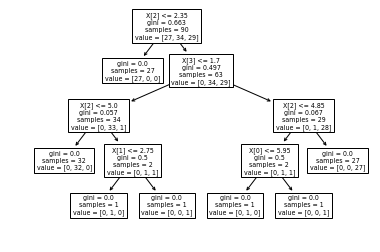

In [12]:
tree.plot_tree(decision_tree)